# Notebook to plot logFC before and after Cellbender

**Created by :** Srivalli Kolla

**Created on :** 17 August, 2024

**Modified on :** 17 September, 2024

**Institute of SystemsImmunology, University of Würuburg**

Env : scanpy(Python 3.12.4)

# Importing packages

In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scanpy as sc

In [83]:
sc.settings.verbosity = 3
sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 300, color_map = 'RdPu', dpi_save = 300, vector_friendly = True, format = 'svg')

-----
anndata     0.10.8
scanpy      1.10.2
-----
PIL                 10.3.0
asttokens           NA
attr                23.2.0
cffi                1.16.0
colorama            0.4.6
comm                0.2.2
cycler              0.12.1
cython_runtime      NA
dateutil            2.9.0.post0
debugpy             1.8.2
decorator           5.1.1
defusedxml          0.7.1
distutils           3.12.4
django              5.0.6
executing           2.0.1
h5py                3.11.0
igraph              0.11.5
ipykernel           6.29.5
ipython_genutils    0.2.0
ipywidgets          8.1.3
jedi                0.19.1
joblib              1.4.2
kiwisolver          1.4.5
legacy_api_wrap     NA
leidenalg           0.10.2
llvmlite            0.43.0
louvain             0.8.2
matplotlib          3.8.4
matplotlib_inline   0.1.7
mpl_toolkits        NA
natsort             8.4.0
numba               0.60.0
numexpr             2.10.1
numpy               1.26.4
packaging           24.1
pandas              2.2.2
parso  

# Importing data - logFC

1. Import logFC values
2. Name the order of models

In [84]:
log_data = {
    'Model' : ['0.01 Ambient', '0.03 Ambient', '0.05 Ambient', '0.07 Ambient', '0.1 Ambient',
          '0.01 Full', '0.03 Full', '0.05 Full', '0.07 Full', '0.1 Full'],
    'Myl2': [-1.15, -1.19, -1.24, -1.29, -1.35, -1.17, -1.21, -1.26, -1.31, -1.38],
    'Mb': [-1.08, -1.08, -1.10, -1.13, -1.18, -1.10, -1.10, -1.12, -1.15, -1.20],
    'Myh6': [-1.05, -1.08, -1.12, -1.16, -1.24, -1.07, -1.09, -1.13, -1.17, -1.26],
    'Tnni3': [-0.96, -0.93, -0.92, -0.91, -0.91, -0.97, -0.94, -0.92, -0.92, -0.93],
    'Camk1d': [-0.95, -1.03, -1.12, -1.21, -1.34, -0.95, -1.03, -1.13, -1.22, -1.35],
    'Ttn': [-0.93, -1.06, -1.30, -1.73, -2.03, -0.94, -1.08, -1.33, -1.74, -2.09],
    'AY036118': [-0.76, -0.77, -0.80, -0.84, -0.90, -0.77, -0.79, -0.81, -0.85, -0.91],
    'Gm42418': [-0.73, -0.82, -0.92, -1.01, -1.11, -0.71, -0.81, -0.90, -0.99, -1.10],
    'Tnnt2': [-0.68, -0.63, -0.58, -0.56, -0.55, -0.70, -0.64, -0.59, -0.57, -0.56],
    'Atp2a2': [-0.67, -0.73, -0.81, -0.89, -0.98, -0.69, -0.76, -0.84, -0.91, -1.00],
    'Ryr2': [-0.53, -0.64, -0.84, -1.14, -1.50, -0.56, -0.68, -0.87, -1.15, -1.51],
    'Cox4i1': [-0.53, -0.46, -0.41, -0.36, -0.32, -0.55, -0.48, -0.43, -0.38, -0.34],
    'Cox6c': [-0.51, -0.44, -0.38, -0.33, -0.29, -0.53, -0.46, -0.40, -0.36, -0.32],
    'Fth1': [-0.44, -0.38, -0.33, -0.29, -0.26, -0.45, -0.39, -0.34, -0.31, -0.28],
    'Atp5g1': [-0.44, -0.34, -0.24, -0.16, -0.08, -0.45, -0.35, -0.25, -0.17, -0.09],
    'Pln': [-0.41, -0.34, -0.30, -0.28, -0.25, -0.42, -0.35, -0.31, -0.29, -0.26],
    'Tnnc1': [-0.38, -0.26, -0.15, -0.06, 0.04, -0.38, -0.27, -0.15, -0.06, 0.03],
    'Cryab': [-0.33, -0.22, -0.13, -0.04, 0.04, -0.34, -0.23, -0.13, -0.05, 0.03],
    'Cmss1': [-0.30, -0.34, -0.40, -0.47, -0.56, -0.30, -0.35, -0.41, -0.48, -0.58],
    'Fhl2': [-0.28, -0.24, -0.22, -0.25, -0.33, -0.30, -0.27, -0.25, -0.26, -0.32],
    'Hbb-bs': [-0.27, -0.32, -0.39, -0.47, -0.59, -0.26, -0.31, -0.39, -0.46, -0.58],
    'Gsn': [-0.15, -0.26, -0.40, -0.51, -0.67, -0.16, -0.28, -0.41, -0.52, -0.69],
    'Malat1': [-0.01, -0.15, -0.40, -0.91, -1.11, -0.01, -0.16, -0.44, -0.89, -1.15],
    'Cacna1c': [0.06, -0.15, -0.46, -0.62, -0.69, 0.04, -0.20, -0.47, -0.63, -0.69],
    'Slc8a1': [0.32, 0.07, -0.29, -0.53, -0.72, 0.29, 0.05, -0.30, -0.56, -0.74],
    'Zbtb20': [0.84, 0.83, 0.69, 0.55, 0.52, 0.83, 0.83, 0.68, 0.55, 0.52]
}

In [85]:
logfc_df = pd.DataFrame(log_data).set_index('Model')
logfc_df_transpose = logfc_df.T

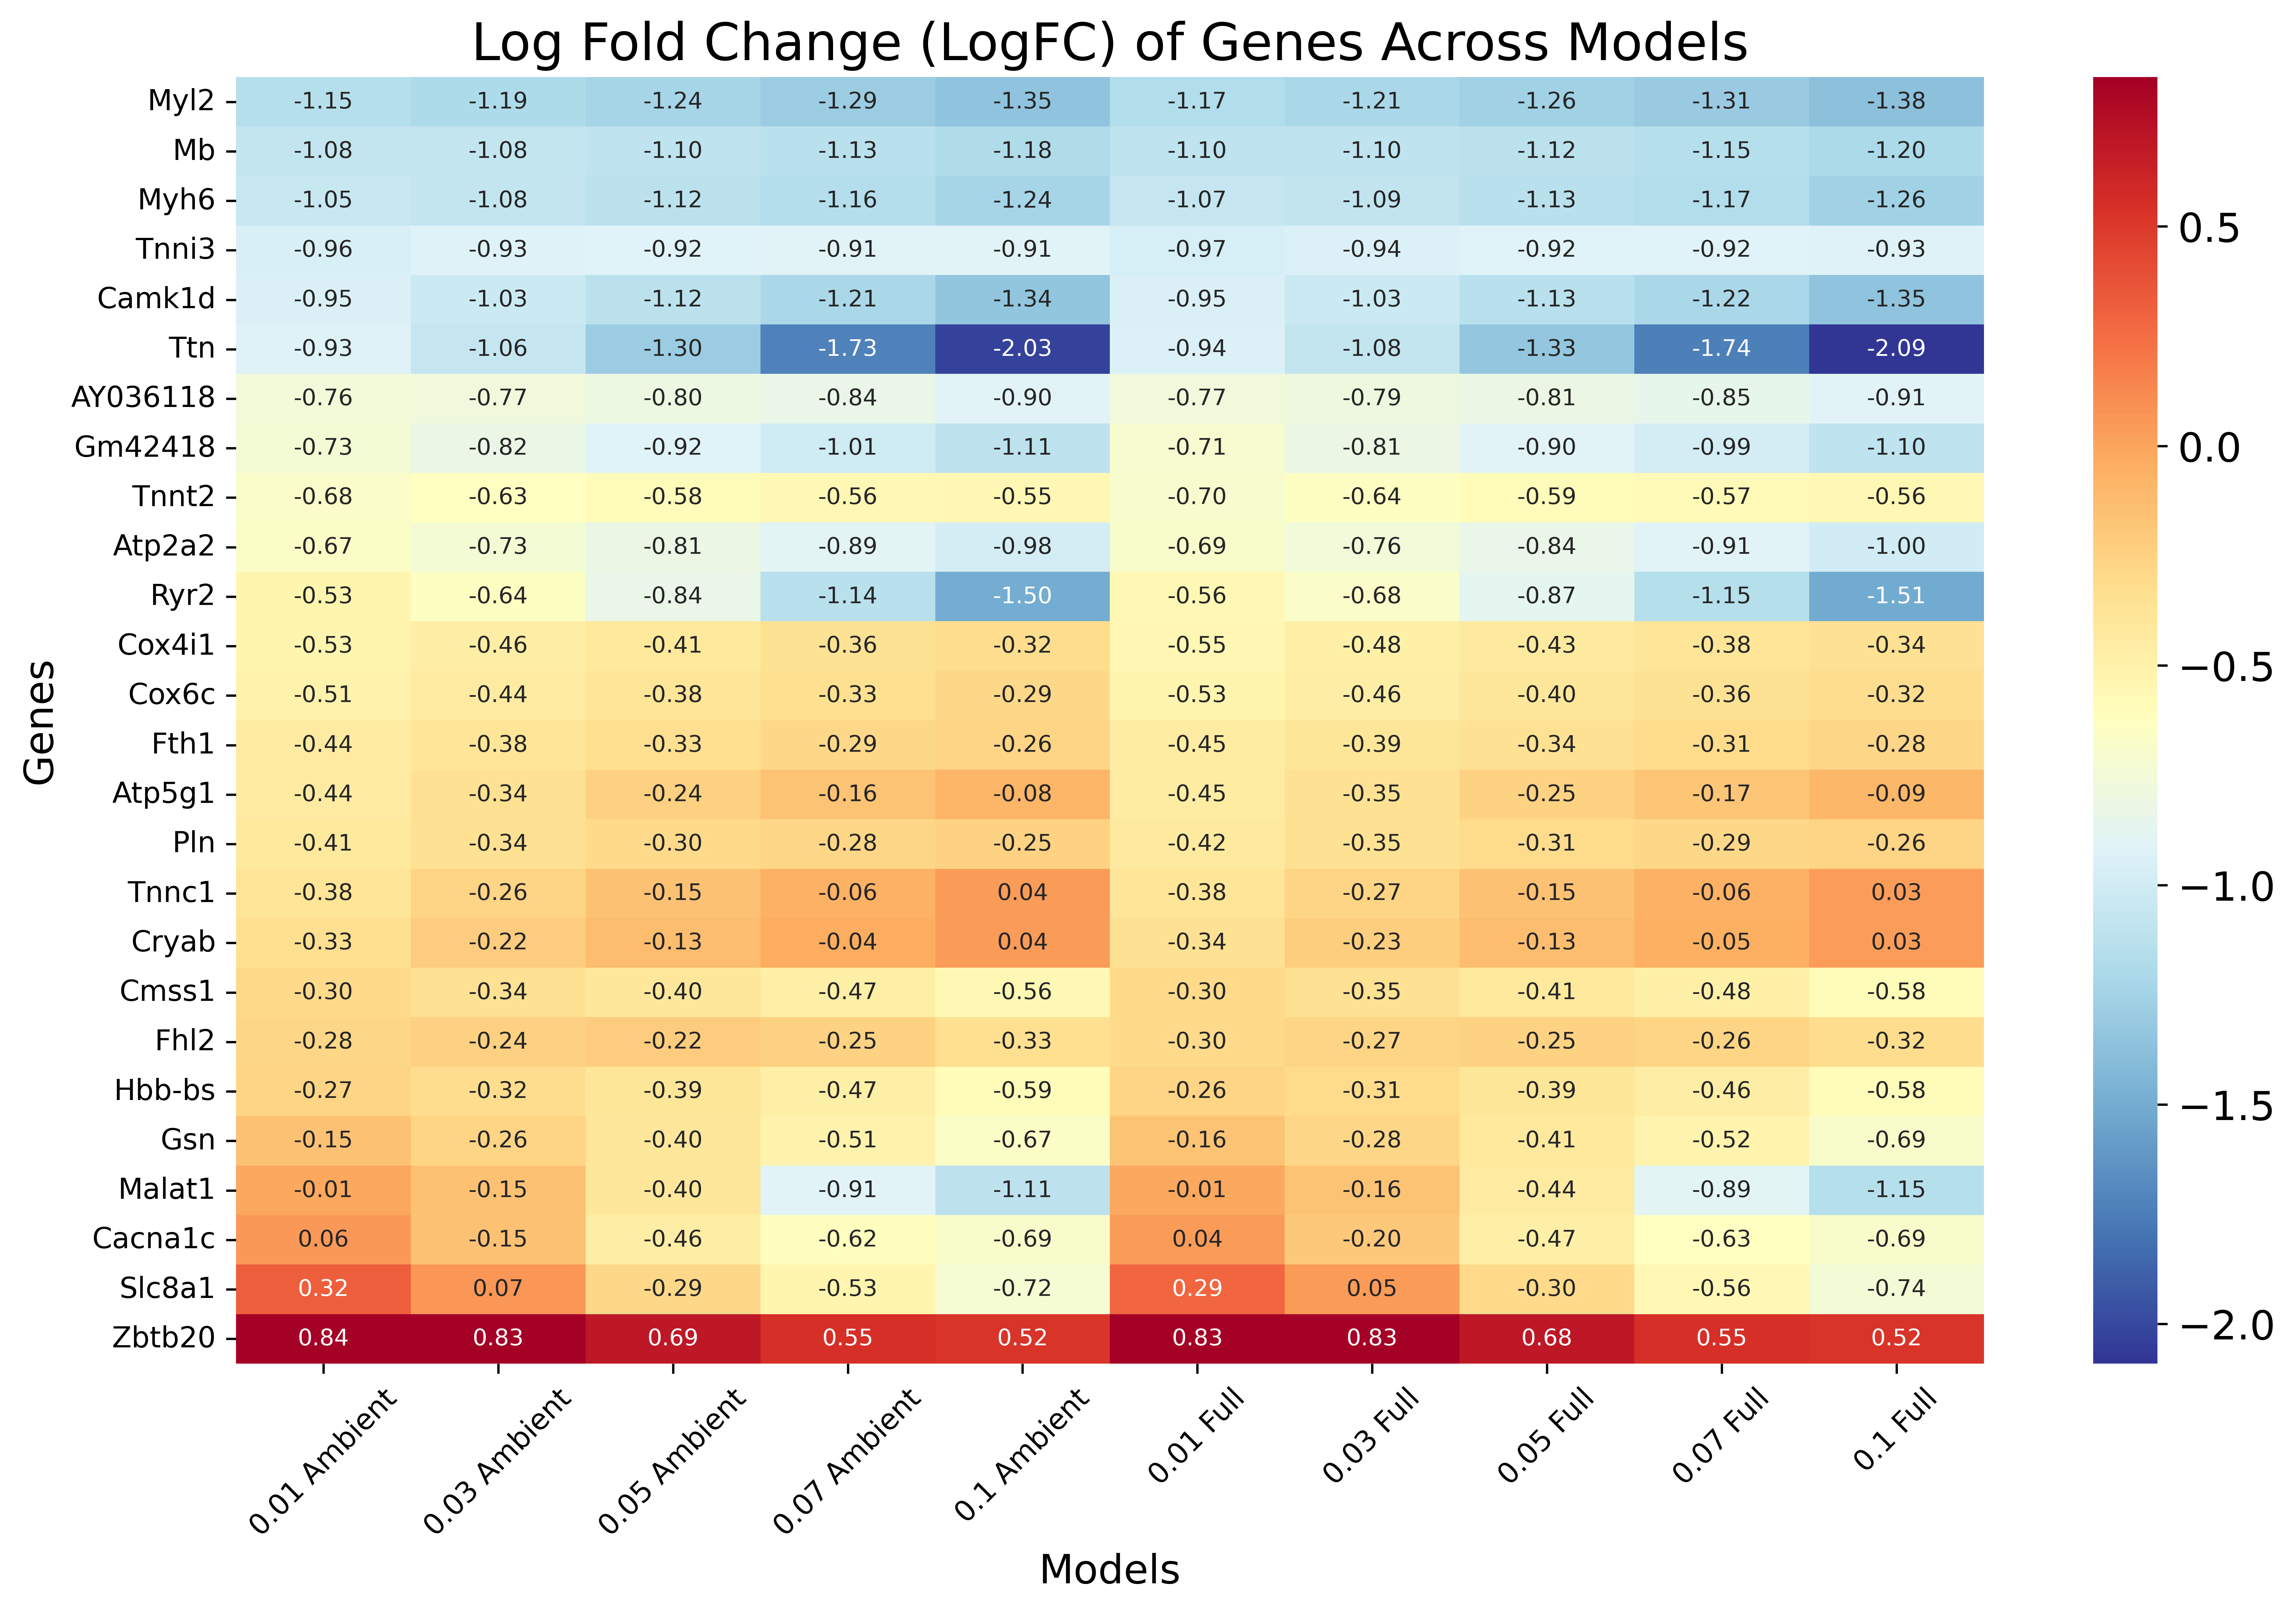

In [86]:
plt.figure(figsize=(12, 8))
ax = sns.heatmap(logfc_df_transpose, annot=True, cmap='RdYlBu_r', fmt='.2f', annot_kws={"size": 8}, linewidths=0, linecolor='none')  
ax.grid(False)
plt.title('Log Fold Change (LogFC) of Genes Across Models', fontsize = 18)
plt.xlabel('Models')
plt.ylabel('Genes')
plt.xticks(rotation = 45, fontsize = 10)
plt.yticks(fontsize = 10)
plt.tight_layout()
plt.show()

# Importing data - Mean Expression valueas

In [87]:
mean_data = {
    'Model': ['Before Cellbender', '0.01 Ambient', '0.03 Ambient', '0.05 Ambient', '0.07 Ambient', '0.1 Ambient', '0.01 Full', '0.03 Full', '0.05 Full', '0.07 Full', '0.1 Full'],
    'Myl2': [8.47, 7.32, 7.28, 6.08, 5.99, 4.73, 4.82, 3.52, 3.56, 2.21, 2.18],
    'Mb': [7.88, 6.8, 6.8, 5.7, 5.67, 4.52, 4.57, 3.42, 3.45, 2.27, 2.25],
    'Myh6': [7.71, 6.66, 6.63, 5.54, 5.47, 4.3, 4.4, 3.21, 3.27, 2.04, 2.01],
    'Tnni3': [7.31, 6.35, 6.38, 5.43, 5.47, 4.52, 4.5, 3.58, 3.58, 2.66, 2.65],
    'Camk1d': [8.74, 7.79, 7.71, 6.67, 6.5, 5.33, 5.55, 4.3, 4.42, 3.08, 3.07],
    'Ttn': [6.17, 5.24, 5.11, 3.94, 3.38, 1.91, 2.44, 0.83, 1.11, -0.91, -0.98],
    'AY036118': [7.87, 7.11, 7.1, 6.31, 6.26, 5.41, 5.49, 4.62, 4.68, 3.77, 3.77],
    'Gm42418': [10.89, 10.16, 10.07, 9.24, 9.06, 8.13, 8.35, 7.32, 7.45, 6.33, 6.35],
    'Tnnt2': [6.82, 6.14, 6.19, 5.56, 5.63, 5.01, 4.93, 4.37, 4.34, 3.8, 3.78],
    'Atp2a2': [6.64, 5.97, 5.91, 5.16, 5.02, 4.18, 4.33, 3.42, 3.49, 2.51, 2.49],
    'Ryr2': [3.13, 2.6, 2.49, 1.76, 1.35, 0.26, 0.79, -0.42, -0.08, -1.57, -1.59],
    'Cox4i1': [6.04, 5.51, 5.58, 5.1, 5.22, 4.78, 4.67, 4.3, 4.24, 3.92, 3.9],
    'Cox6c': [5.96, 5.45, 5.52, 5.07, 5.19, 4.78, 4.66, 4.32, 4.26, 3.96, 3.94],
    'Fth1': [5.35, 4.91, 4.97, 4.58, 4.68, 4.32, 4.23, 3.93, 3.89, 3.62, 3.61],
    'Atp5g1': [5, 4.56, 4.66, 4.32, 4.5, 4.24, 4.05, 3.89, 3.8, 3.72, 3.71],
    'Pln': [6.12, 5.71, 5.78, 5.41, 5.5, 5.16, 5.08, 4.81, 4.77, 4.52, 4.51],
    'Tnnc1': [5.02, 4.64, 4.76, 4.49, 4.7, 4.53, 4.32, 4.26, 4.17, 4.2, 4.2],
    'Cryab': [4.81, 4.48, 4.59, 4.35, 4.55, 4.39, 4.21, 4.16, 4.08, 4.11, 4.11],
    'Cmss1': [7.6, 7.3, 7.26, 6.9, 6.79, 6.34, 6.49, 5.99, 6.08, 5.51, 5.5],
    'Fhl2': [3.62, 3.34, 3.38, 3.12, 3.13, 2.79, 2.83, 2.52, 2.58, 2.26, 2.26],
    'Hbb-bs': [4.94, 4.67, 4.62, 4.28, 4.15, 3.69, 3.89, 3.38, 3.5, 2.92, 2.92],
    'Gsn': [4.46, 4.31, 4.2, 3.91, 3.69, 3.24, 3.53, 2.96, 3.12, 2.44, 2.43],
    'Malat1': [8.98, 8.97, 8.83, 8.57, 7.92, 7.46, 7.91, 7.3, 7.47, 6.41, 6.32],
    'Cacna1c': [1.64, 1.7, 1.49, 1.24, 0.87, 0.55, 0.91, 0.35, 0.44, -0.28, -0.25],
    'Slc8a1': [2.42, 2.74, 2.49, 2.45, 1.96, 1.73, 2.25, 1.78, 1.95, 1.22, 1.21],
    'Zbtb20': [3, 3.84, 3.83, 4.53, 4.38, 5.05, 5.21, 5.88, 5.89, 6.43, 6.41]
}

In [88]:
mean_df = pd.DataFrame(mean_data).set_index('Model')
mean_df_transpose = mean_df.T

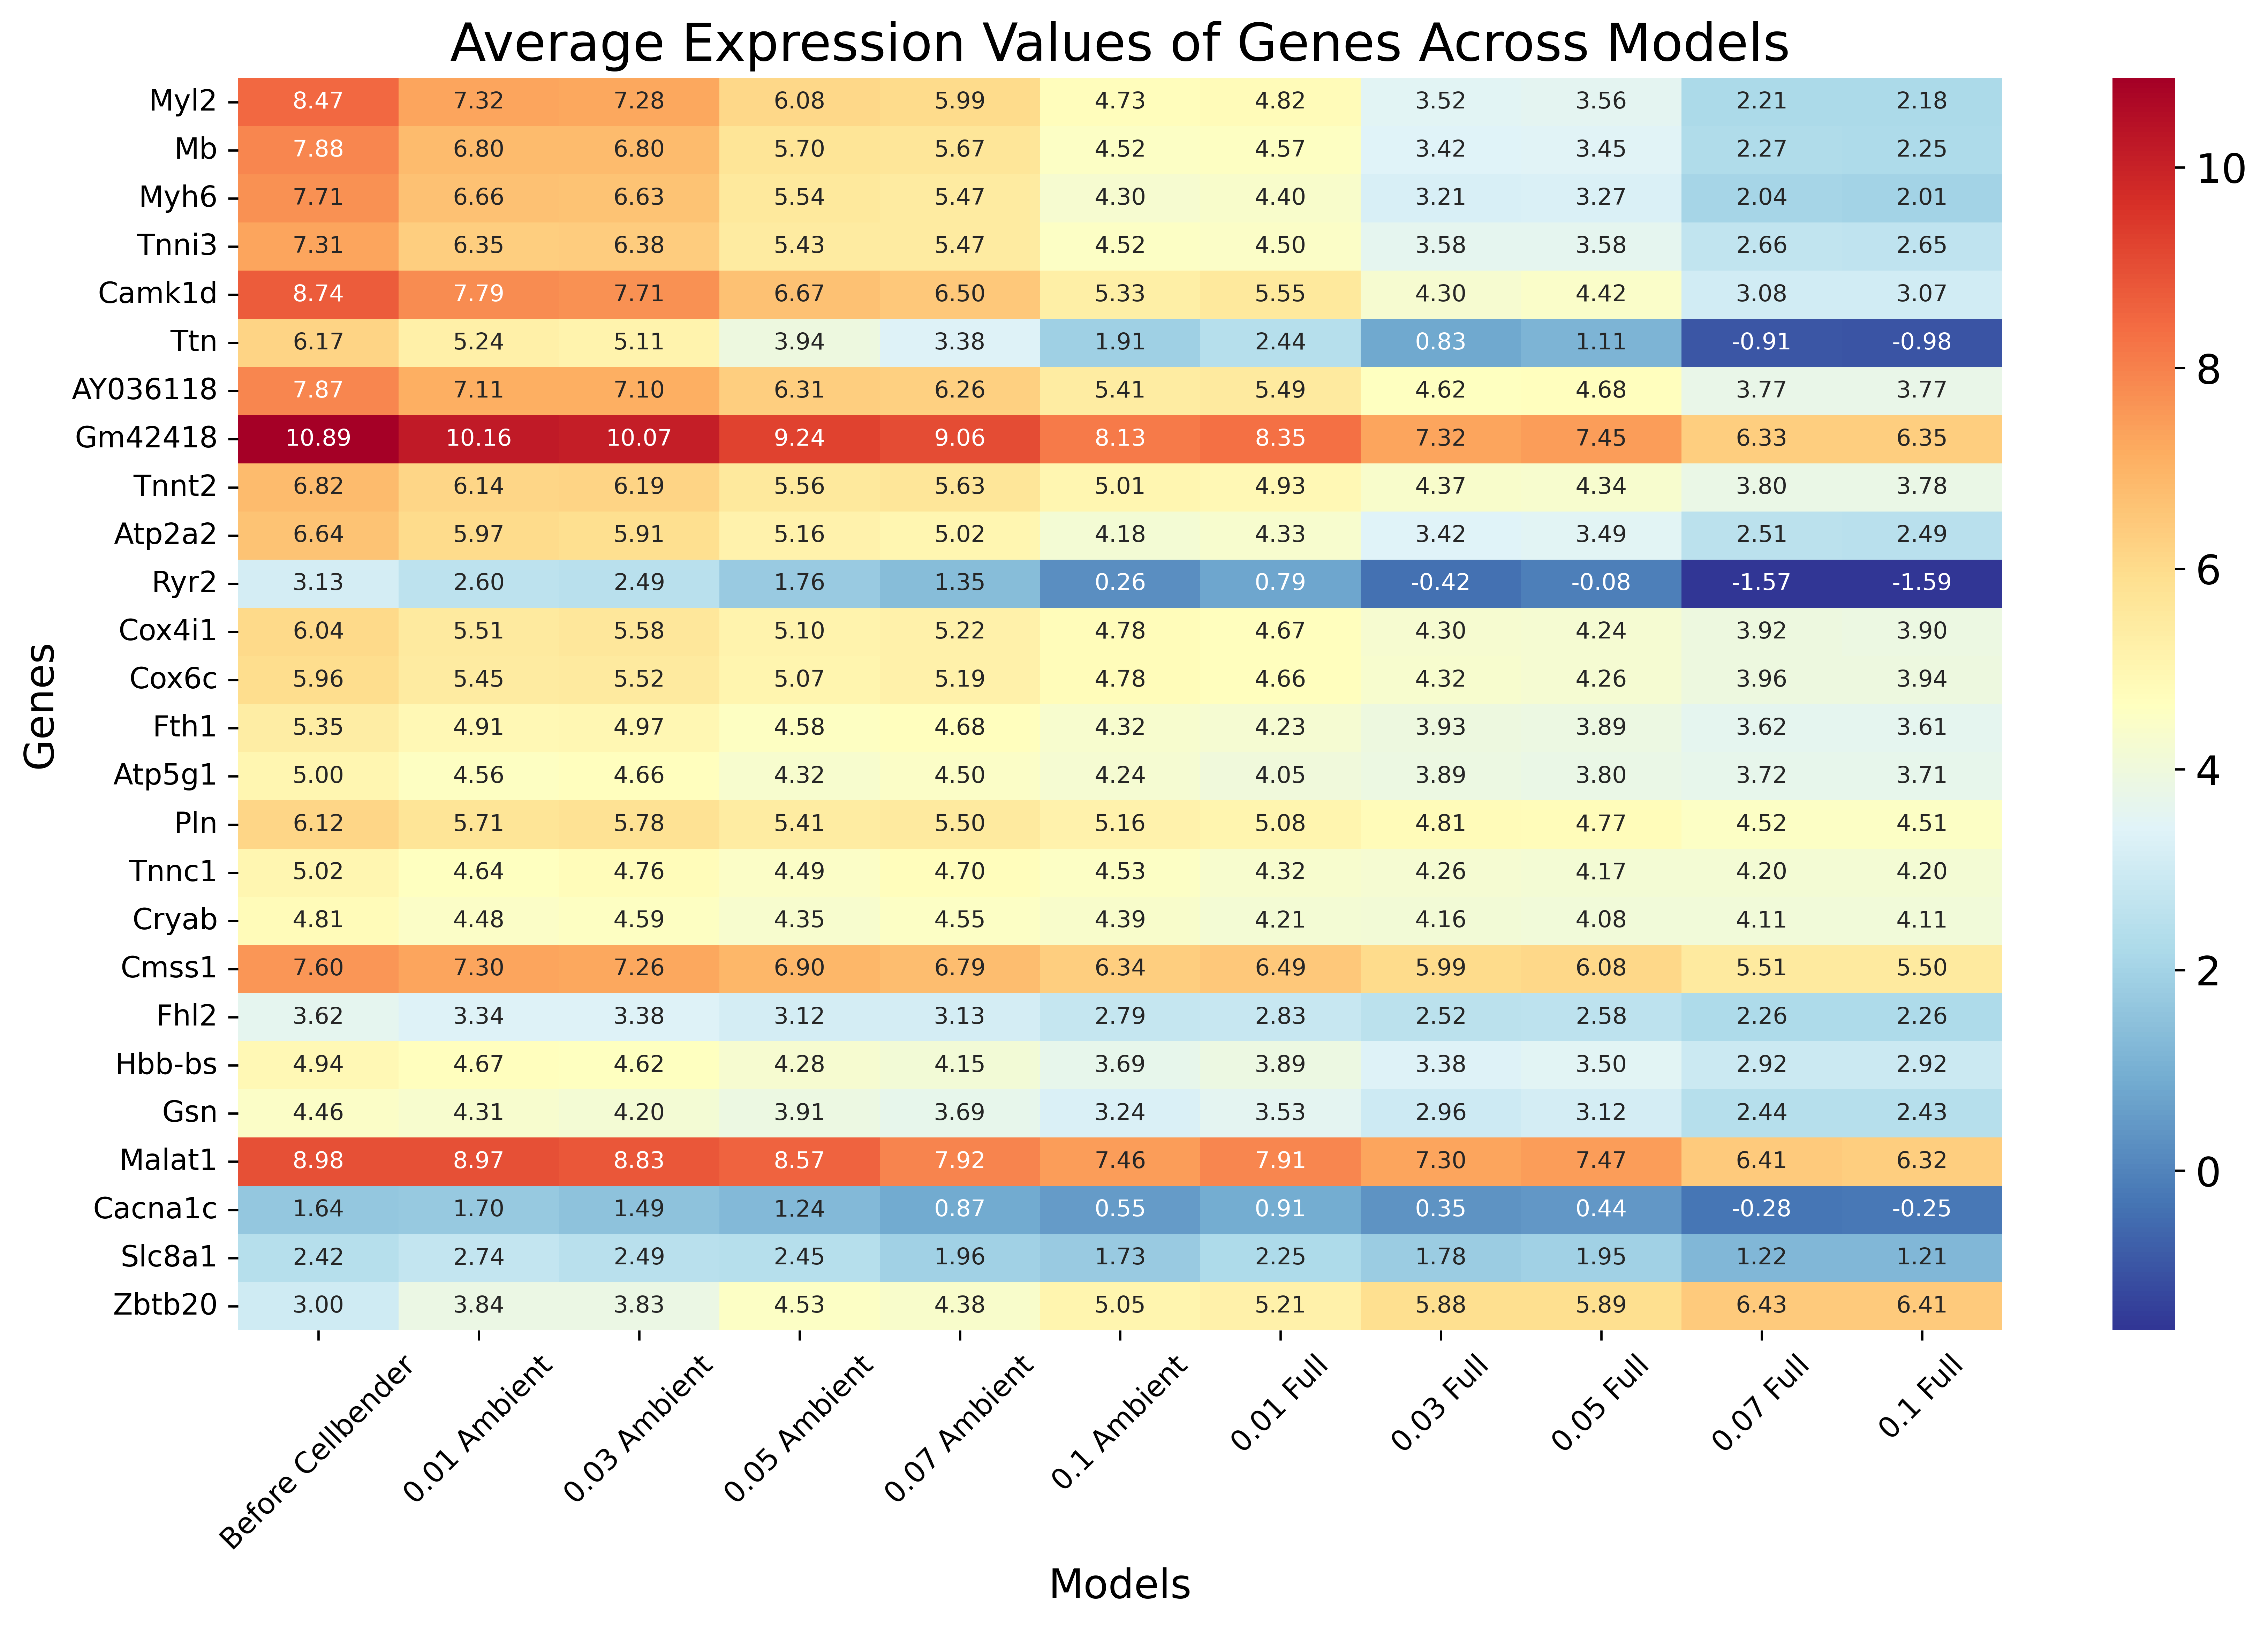

In [90]:
plt.figure(figsize=(12, 8))
ax = sns.heatmap(mean_df_transpose, annot=True, cmap='RdYlBu_r', fmt='.2f', annot_kws={"size": 8}, linewidths=0, linecolor='none')  
ax.grid(False)
plt.title('Average Expression Values of Genes Across Models', fontsize = 18)
plt.xlabel('Models')
plt.ylabel('Genes')
plt.xticks(rotation = 45, fontsize = 10)
plt.yticks(fontsize = 10)
plt.tight_layout()
plt.show()